# SMS/Email Spam Classifier
## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gfPhvjMR

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA, Data Pre-Processing
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Tokenization
6. Stemming

### 2. All Classification Model
1. Classification Model (Naive bayes, Regression, Tree, Bagging, Boosting and SVM based).
2. Performance metrics for above models.
3. Experiments to improve accuracy and precision score.
4. Models for Web-App and Batch Prediction.

**Dataset:** https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

### 3. Solution Proposed
- Model is trained on SMS spam dataset.

- Same code can be used for Email classification with same model or with model trained on Email spam dataset.

- In this project, the affirmative class (one) indicates that the message is spam, while the negative class(zero) indicates that the message is ham i.e. Normal.

- The aim is to correctly classify the messages and reduce False Positive.

- False Positive => The message is ham but model prediction is spam. This will lead to receipt of important messages.

- The following steps are performed in Jupyter notebook:

**1. Basic data Cleaning and EDA**

**2. Data pre-processing (lowercase, tokenisation, special character removal, stemming)**

**3. Model Building**

- **3.1 Label Encoding**
- **3.2 Text Vectorization (BOW and TF-IDF) **
- **3.3 Models**

- **3.3.1 Naive Bayes Models**

- Gaussian, Multinomial and Bernoulli Naive Bayes.
- Multinomial Naive Bayes along with TF-IDF gives best precision score and good accuracy.
- **3.3.2 Other Models**

- Logistic Regression, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Random Forest Classifier, Bagging Classifier, Extra Tree Classifier, AdaBoost Classifier, GradientBoost Classifier, K Neighbours Classifier, XGBoost Classifier.
- Support Vector Classifier gives same precision score as that of Multinomial Naive Bayes
- **3.3.3 Experiments to increase Precision score**

- TF-IDF with max_features hyper-parameter. Here accuracy score of best model increases with max precision score.
- Voting Classifier on top 3 Models. No significant change in precision score and accuracy score of best model.
- Using No. of characters column. Accuracy score of best model decreases.
- **3.3.4 Best model**
- Multinomial Naive Bayes along with TF-IDF and max_features equal to 3500.

**Deployment**
- Web app is created for single prediction.
- Batch Prediction script is created for bulk prediction.

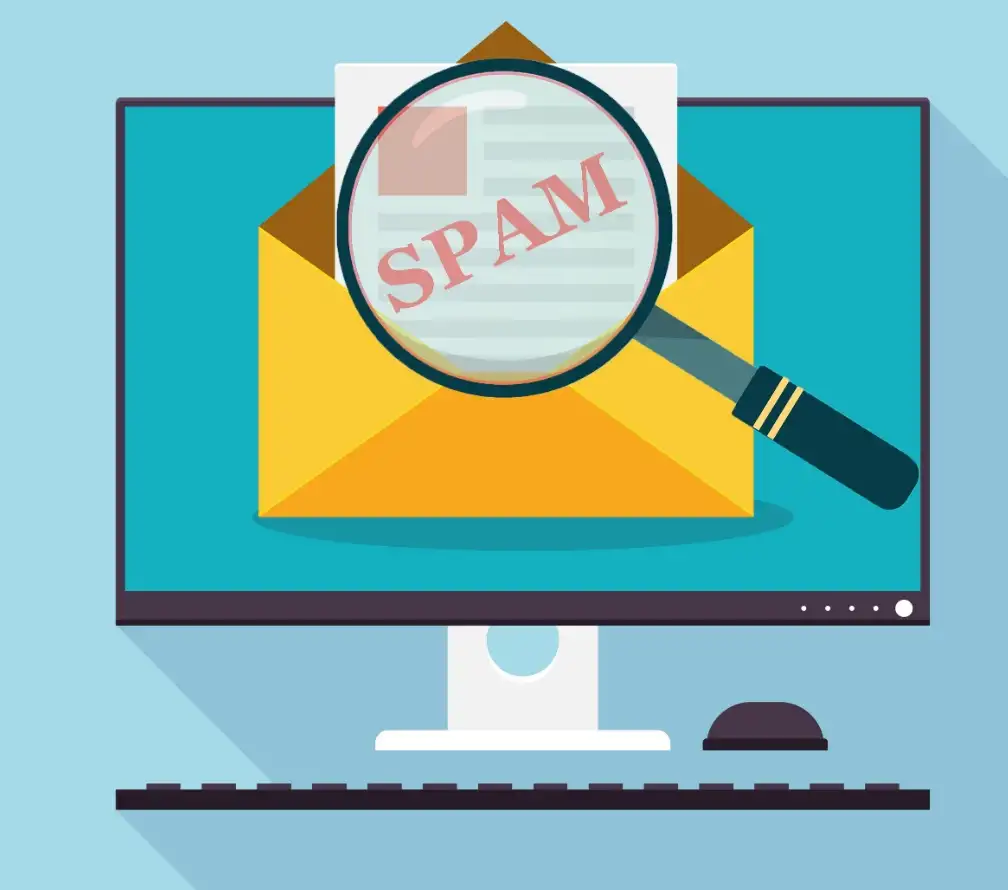

In [2]:
from IPython import display
display.Image("image.jpg")

## <span style='color:red '>1.0 Importing required libraries</span>

In [133]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

### To check punctuation marks
import string

### For text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### to visualize most common word in our text
from wordcloud import WordCloud

### to count most frequent words
from collections import Counter

### for saving models and other objects
import pickle


### This is for tokenszation
nltk.download('punkt')
### This is for lemmatization
nltk.download('wordnet')
### This is supporting requirement for lemmatization
nltk.download('omw-1.4')
### This is for stopwords
nltk.download('stopwords')

## <span style='color:red '>2.0 Importing Dataset and Data Cleaning</span>

In [134]:
dataset = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['Target', 'Text'])
dataset.head(10)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [136]:
dataset[dataset.duplicated()].count()

Target    403
Text      403
dtype: int64

In [137]:
dataset.shape

(5572, 2)

In [138]:
dataset.drop_duplicates(keep='first', inplace=True)

In [139]:
dataset.shape

(5169, 2)

In [140]:
dataset[dataset.duplicated()].count()

Target    0
Text      0
dtype: int64

In [141]:
dataset.isnull().sum()

Target    0
Text      0
dtype: int64

## <span style='color:red '>3.0 Exploratory Data Analysis</span>

In [142]:
dataset.sample(10)

,Target,Text
765,ham,"Wishing you and your family Merry ""X"" mas and ..."
4927,ham,"Oh yes, why is it like torture watching england?"
2510,ham,U wake up already? Wat u doing? U picking us u...
4466,ham,CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...
721,ham,Oh is it? Send me the address
3517,ham,"Well, I was about to give up cos they all said..."
295,ham,I accidentally deleted the message. Resend ple...
1979,ham,No I'm in the same boat. Still here at my moms...
434,ham,Booked ticket for pongal?
1439,ham,"Arms fine, how's Cardiff and uni?"


In [143]:
dataset.Target.value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

Text(0.5, 1.0, 'Count of Ham and Spam in Target feature')

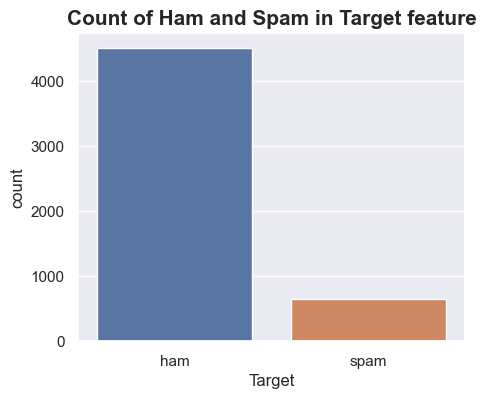

In [145]:
sns.countplot(data=dataset, x='Target')
sns.set(rc={'figure.figsize':(5,4)})
plt.title('Count of Ham and Spam in Target feature', fontsize=15, fontweight='bold')

### <span style='color:blue '>Observation</span>
1. Dataset is imbalenced. So accuracy cannot be considered as primary performance indicator.

In [146]:
### Getting no. of characters in each record
dataset['No. of Characters']= dataset['Text'].apply(len)
dataset.head()

,Target,Text,No. of Characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [147]:
### Getting no. of words in each record
dataset['No. of Words']= dataset['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

,Target,Text,No. of Characters,No. of Words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [148]:
### Getting no. of Sentences in each record
dataset['No. of Sentences']= dataset['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [149]:
### Descriptive stats for newly created 3 features
dataset[['No. of Characters', 'No. of Words', 'No. of Sentences']].describe()

,No. of Characters,No. of Words,No. of Sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.591023,1.954924
std,58.437457,13.402840,1.366937
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [150]:
### Getting Descriptive stats where target value is ham
dataset[dataset['Target']== 'ham'][['No. of Characters', 'No. of Words', 'No. of Sentences']].describe()

,No. of Characters,No. of Words,No. of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [151]:
### Getting Descriptive stats where target value is spam
dataset[dataset['Target']== 'spam'][['No. of Characters', 'No. of Words', 'No. of Sentences']].describe()

,No. of Characters,No. of Words,No. of Sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


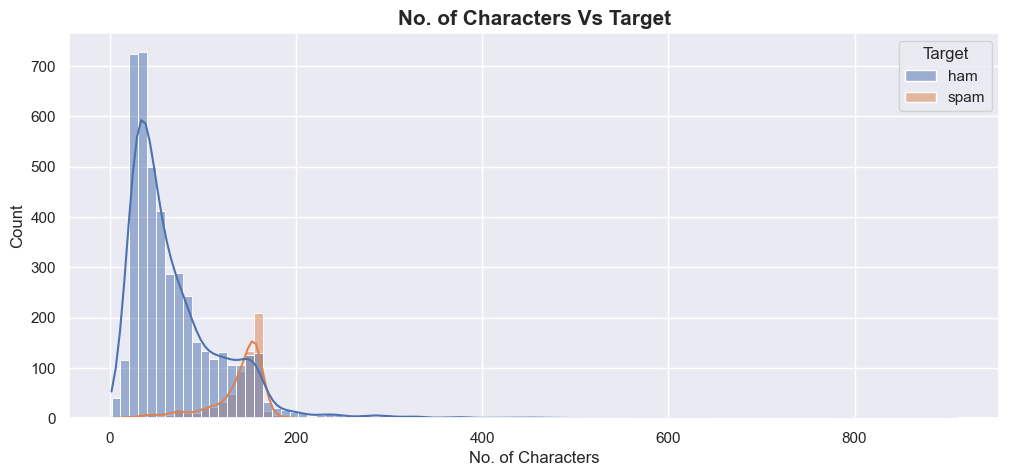

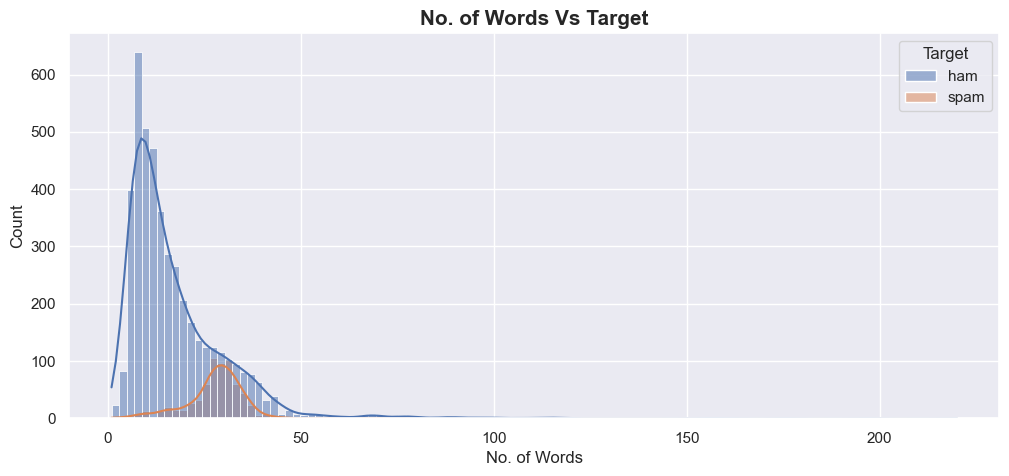

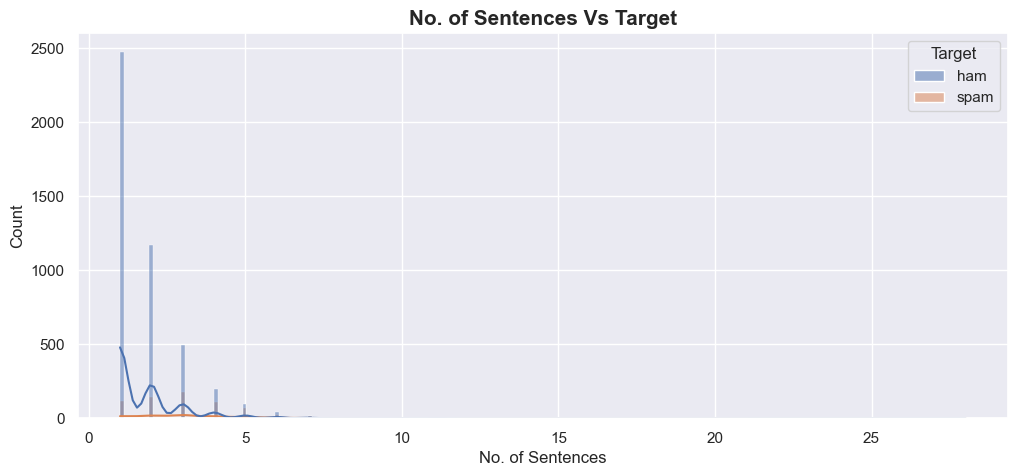

In [152]:
for feature in ['No. of Characters', 'No. of Words', 'No. of Sentences']:
    sns.set(rc={'figure.figsize':(12,5)})
    sns.histplot(data=dataset, x=feature, kde=True, color='blue', hue='Target')
    plt.title("{} Vs Target".format(feature),fontweight="bold", fontsize=15)
    plt.show();
    

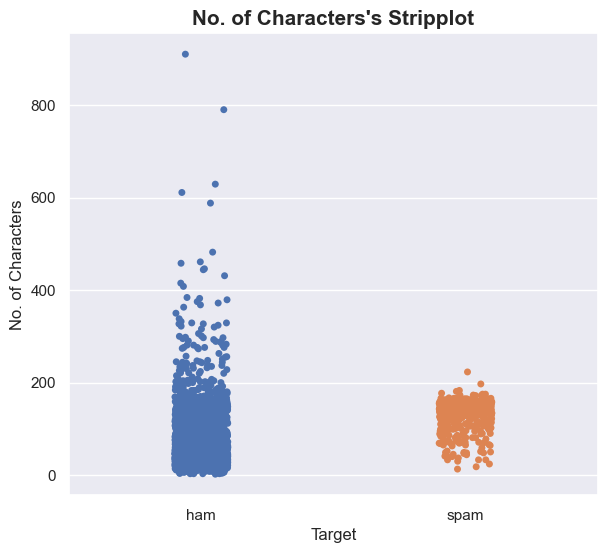

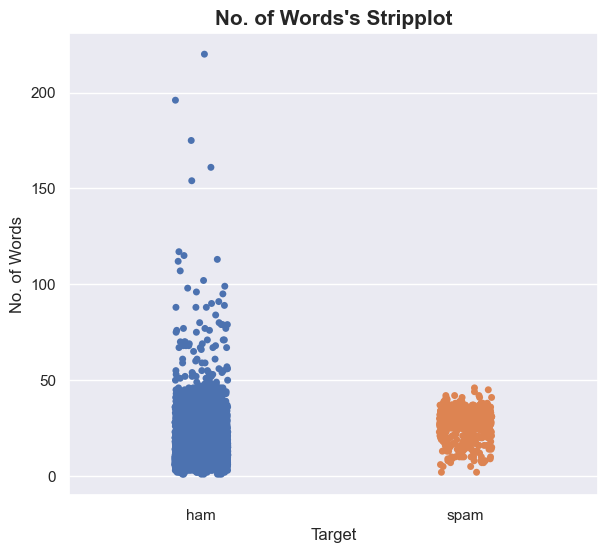

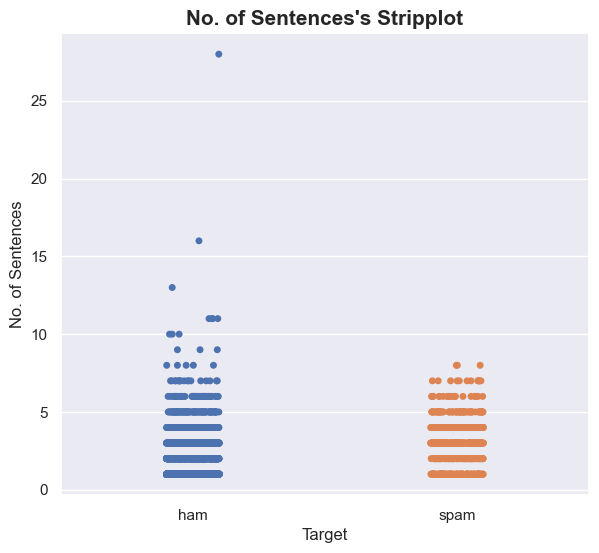

In [153]:
for feature in ['No. of Characters', 'No. of Words', 'No. of Sentences']:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.stripplot(data=dataset, y=feature, x='Target')
    plt.title("{}'s Stripplot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

In [154]:
data= dataset.copy()
data.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [155]:
data['Target']=data.Target.replace({'ham': 0, 'spam':1})
data.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


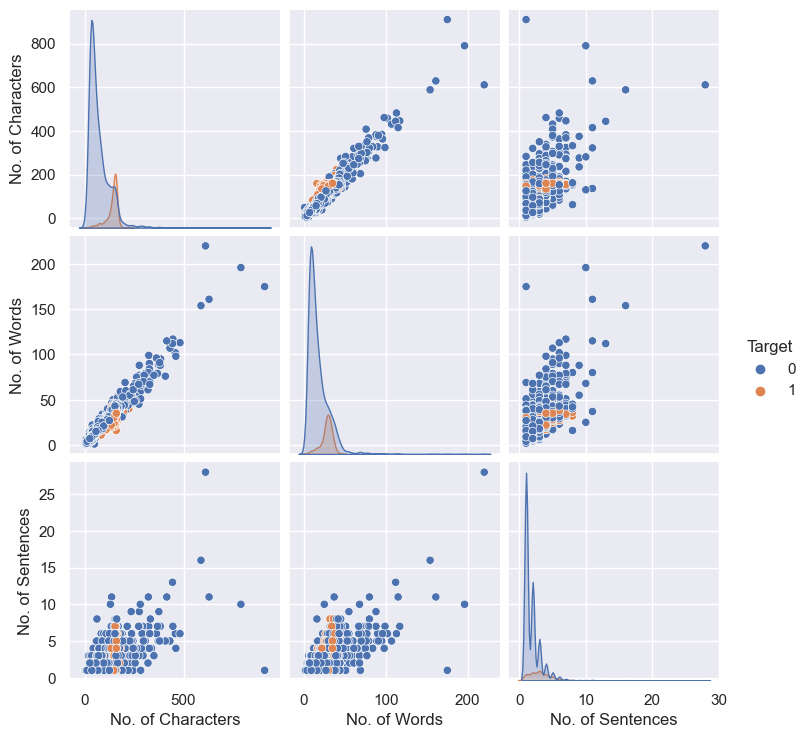

<Figure size 2000x1000 with 0 Axes>

In [156]:
sns.pairplot(data=data, hue='Target')
plt.figure(figsize=(20,10))
plt.show();

In [157]:
corr= round(data.corr(), 2)
corr

,Target,No. of Characters,No. of Words,No. of Sentences
Target,1.00,0.38,0.26,0.29
No. of Characters,0.38,1.00,0.97,0.64
No. of Words,0.26,0.97,1.00,0.68
No. of Sentences,0.29,0.64,0.68,1.00


<AxesSubplot:>

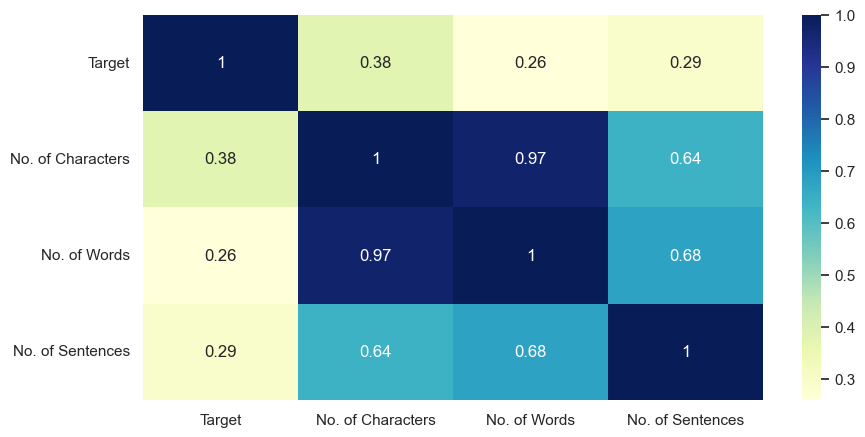

In [158]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=corr, annot=True, cmap="YlGnBu")

## <span style='color:red '>4.0 Data Pre-Processing</span>

In [159]:
dataset.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [160]:
stemmer= PorterStemmer()
def text_transformer(in_text):
    ### lowering the text
    in_text=in_text.lower()
    ### seperating each word
    in_text=nltk.word_tokenize(in_text)
    ### removing special characters from in_text
    temp_list=[]
    for word in in_text:
        if word.isalnum():
            temp_list.append(word)
    in_text= temp_list.copy()
    temp_list.clear()
    
    ### removing stopwords and punctuation marks from in_text
    for word in in_text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            temp_list.append(word)
    in_text=temp_list.copy()
    temp_list.clear()
    
    ### Stemming the words to get base form of words
    for word in in_text:
        temp_list.append(stemmer.stem(word))
    ### joining all words in list and returning complete sentence/ document
    return " ".join(temp_list)

In [161]:
### sample
dataset['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [162]:
text_transformer(dataset['Text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [163]:
### applying text_transformer function to text column in dataset

dataset['Transformed_text']= dataset['Text'].apply(text_transformer)
dataset.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences,Transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [164]:
### Creating a wordcloud object to vsualize most frequent words in our data
wc=WordCloud(width=700, height=700, min_font_size=10, background_color='white')

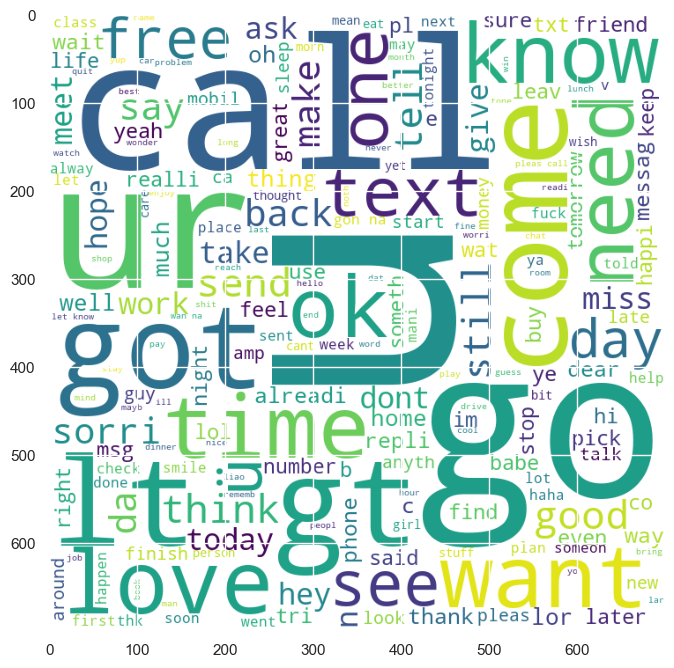

In [165]:
### wordcloud for complete dataset
total_wc=wc.generate(dataset['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(total_wc)

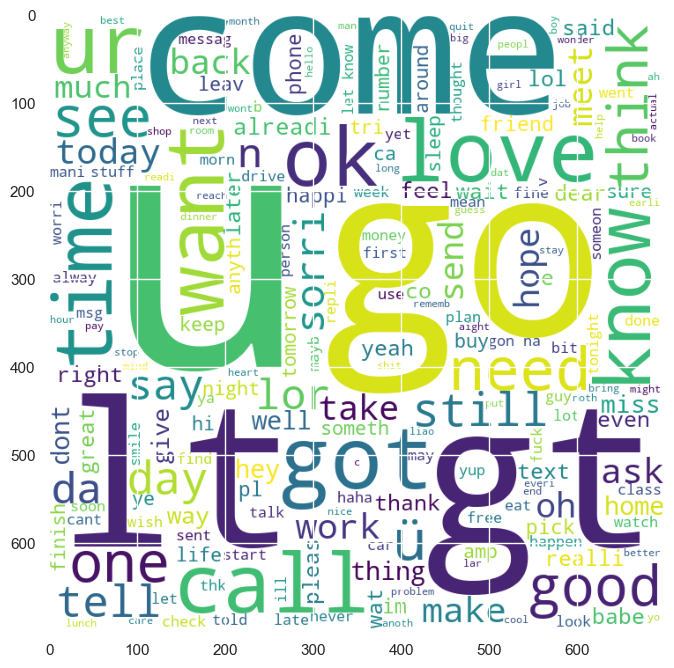

In [166]:
### wordcloud for ham 
ham_wc=wc.generate(dataset[dataset['Target']=='ham']['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

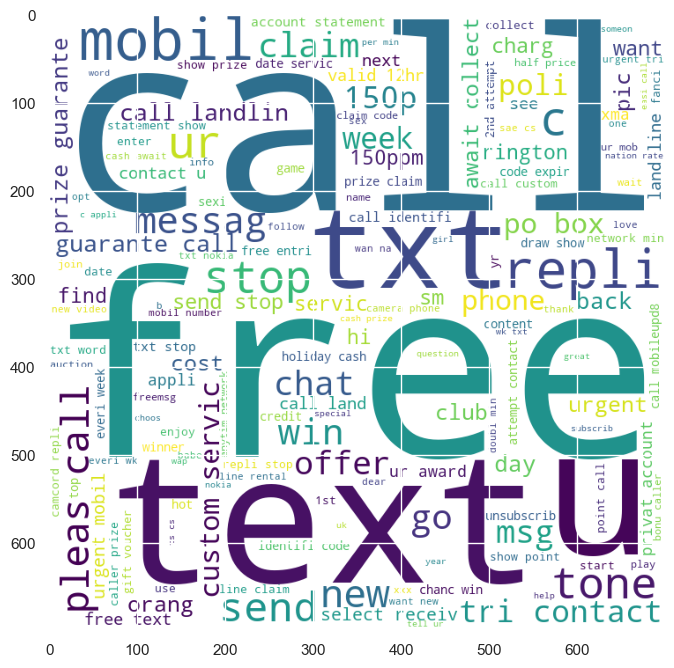

In [167]:
### wordcloud for spam 
spam_wc=wc.generate(dataset[dataset['Target']=='spam']['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [168]:
spam_corpus=[]
for sent in dataset[dataset['Target']=='spam']['Transformed_text'].tolist():
    for word in sent.split():
        spam_corpus.append(word)

In [169]:
len(spam_corpus)

9982

In [170]:
spam=pd.DataFrame(Counter(spam_corpus).most_common(30)).rename(columns={0:'Most frequent word', 1:'Frequency'})
spam.head(30)

,Most frequent word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


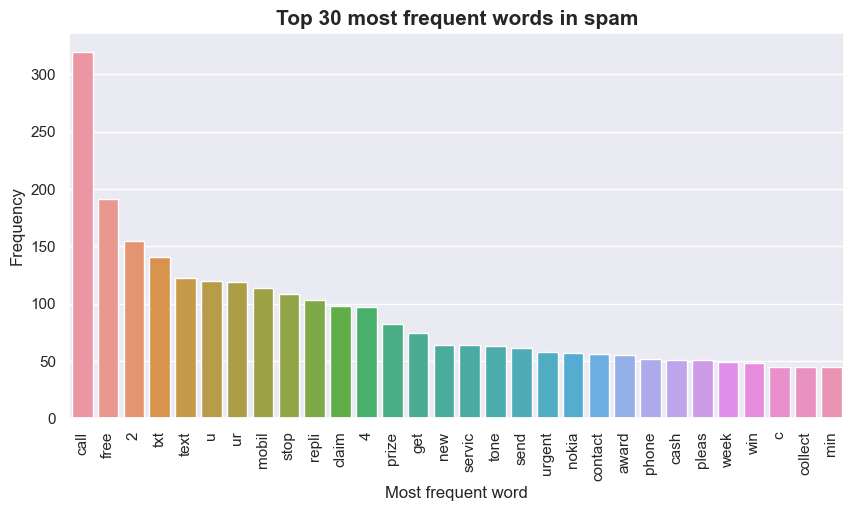

In [171]:
sns.barplot(data=spam, x='Most frequent word', y='Frequency')
plt.xticks(rotation=90)
plt.title('Top 30 most frequent words in spam', fontsize=15, fontweight='bold')
plt.show();

In [172]:
ham_corpus=[]
for sent in dataset[dataset['Target']=='ham']['Transformed_text'].tolist():
    for word in sent.split():
        ham_corpus.append(word)
        
len(ham_corpus)

35929

In [173]:
ham=pd.DataFrame(Counter(ham_corpus).most_common(30)).rename(columns={0:'Most frequent word', 1:'Frequency'})
ham.head(30)

,Most frequent word,Frequency
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


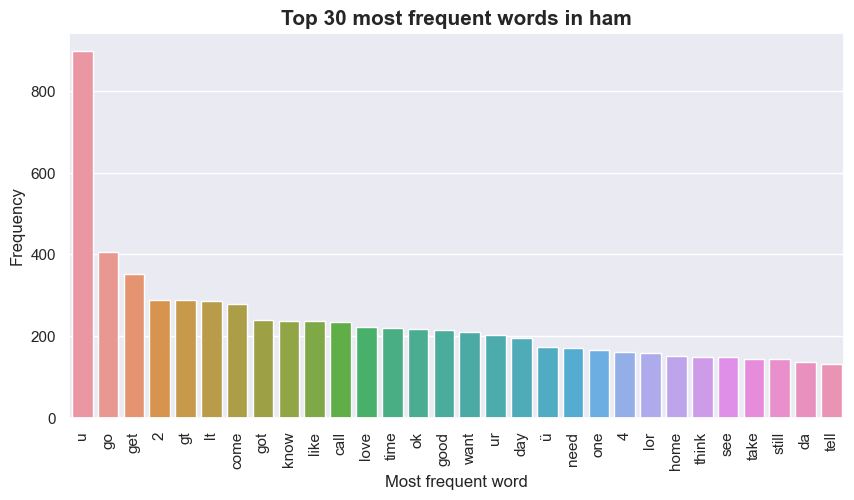

In [174]:
sns.barplot(data=ham, x='Most frequent word', y='Frequency')
plt.xticks(rotation=90)
plt.title('Top 30 most frequent words in ham', fontsize=15, fontweight='bold')
plt.show();

## <span style='color:red '>5.0 Model Building</span>

### <span style='color:red '>5.1 Encoding target feature</span>

In [175]:
encoder=LabelEncoder()

In [176]:
dataset['Target']= encoder.fit_transform(dataset['Target'])
dataset.head()

,Target,Text,No. of Characters,No. of Words,No. of Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### <span style='color:red '>5.2 Vectorization of transformed text and train test split</span>

In [177]:
### Bag of Words
cv=CountVectorizer()

In [178]:
### getting dense array of transformed vectors
X=cv.fit_transform(dataset['Transformed_text']).toarray()

In [179]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [180]:
### shape of transformed text feature
X.shape

(5169, 6782)

In [181]:
### converting target feature to array
y=dataset['Target'].values

In [182]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [183]:
### getting shape of target feature
y.shape

(5169,)

In [184]:
### train test split (80 - 20 percent) with random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [185]:
print(f"Shape of X_train {X_train.shape} and y_train {y_train.shape}")

Shape of X_train (4135, 6782) and y_train (4135,)


In [186]:
print(f"Shape of X_test {X_test.shape} and y_test {y_test.shape}")

Shape of X_test (1034, 6782) and y_test (1034,)


### <span style='color:red '>5.3 Model evaluation and Model trainer Function</span>

In [57]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val):
    """
    The function takes actual value and predicted value as argument 
    and returns Accuracy, Precision, Recall, F-1 Score rounded to 
    3 decimal places.
    """
    acc=round(accuracy_score(actual_val, pred_val),5)
    prec=round(precision_score(actual_val, pred_val),5)
    rec=round(recall_score(actual_val, pred_val),5) 
    f1=round(2*prec*rec/(prec+rec),5)
    roc_auc=round(roc_auc_score(actual_val, pred_val),5)
    return acc, prec, rec, f1, roc_auc

### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

### <span style='color:red '>5.4 Naive Bayes Models with BOW</span>

In [58]:
### creating dictionary containing naive bayes model objects as naive bayes is considered best for text classification
models_NB={
    "Gaussian Naive Bayes":GaussianNB(),
    "Multinomial Naive Bayes":MultinomialNB(),
    "Bernoulli Naive Bayes":BernoulliNB()
}

In [59]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models_NB))):
    ### selecting model
    model=list(models_NB.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models_NB.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models_NB.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Gaussian Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.92334
Precision Score: 0.62441
Recall Score: 1.0
f1 Score: 0.76878
Roc_Auc Score: 0.95607
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.86944
Precision Score: 0.47945
Recall Score: 0.83333
f1 Score: 0.60869
Roc_Auc Score: 0.85389
**************************************************


Multinomial Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.99081
Precision Score: 0.96219
Recall Score: 0.96584
f1 Score: 0.96401
Roc_Auc Score: 0.98015
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.96809
Precision Score: 0.86614
Recall Score: 0.87302
f1 Score: 0.86957
Roc_Auc Score: 0.92715
**************************************************


Bernoulli Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.97848
Precision Score: 0.99103
Recall Score: 0.83871
f1

In [60]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perfNB=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perfNB.drop('index', axis=1, inplace=True)
model_perfNB

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Bernoulli Naive Bayes,0.96518,0.95000,0.75397,0.84071,0.87423
1,Multinomial Naive Bayes,0.96809,0.86614,0.87302,0.86957,0.92715
2,Gaussian Naive Bayes,0.86944,0.47945,0.83333,0.60869,0.85389


### <span style='color:blue '>Observation</span>
1. False Positive => The mail is not spam, but the model predicts it to be spam, we have to reduce false positive.
2. To reduce false positive we must choose model with highest precision.
3. Bernoulli Naive Bayes has highest precision as of now with very good accuracy.

### <span style='color:red '>5.5 Naive Bayes Models with TF-IDF</span>

In [61]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(dataset['Transformed_text']).toarray()
X.shape

(5169, 6782)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models_NB))):
    ### selecting model
    model=list(models_NB.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models_NB.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models_NB.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Gaussian Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.92334
Precision Score: 0.62441
Recall Score: 1.0
f1 Score: 0.76878
Roc_Auc Score: 0.95607
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.86847
Precision Score: 0.47706
Recall Score: 0.8254
f1 Score: 0.60465
Roc_Auc Score: 0.84992
**************************************************


Multinomial Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.97146
Precision Score: 1.0
Recall Score: 0.77609
f1 Score: 0.87393
Roc_Auc Score: 0.88805
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.95938
Precision Score: 1.0
Recall Score: 0.66667
f1 Score: 0.8
Roc_Auc Score: 0.83333
**************************************************


Bernoulli Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.97848
Precision Score: 0.99103
Recall Score: 0.83871
f1 Score: 0.908

In [64]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perfNBT=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perfNBT.drop('index', axis=1, inplace=True)
model_perfNBT

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Multinomial Naive Bayes,0.95938,1.00000,0.66667,0.80000,0.83333
1,Bernoulli Naive Bayes,0.96518,0.95000,0.75397,0.84071,0.87423
2,Gaussian Naive Bayes,0.86847,0.47706,0.82540,0.60465,0.84992


### <span style='color:blue '>Observation</span>
1. Now, Multinomial Naive Bayes has highest precision with very good accuracy. So it is our best naive bayes model.

### <span style='color:red '>5.6 Other Classification Models</span>

In [65]:
### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(solver='liblinear', penalty='l1'),
    "Support Vector Classifier":SVC(kernel='sigmoid', gamma=1.0),
    "Decision Tree Classifier":DecisionTreeClassifier(max_depth=6),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=50,random_state=2),
    "Bagging Classifier": BaggingClassifier(n_estimators=50,random_state=2),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=50,random_state=2),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50,random_state=2),
    "GradientBoost Classifier": GradientBoostingClassifier(n_estimators=50,random_state=2),
    "K Neighbours Classifier" : KNeighborsClassifier(),
    "XGBoost Classifier": XGBClassifier(n_estimators=50,random_state=2),
    "Multinomial Naive Bayes":MultinomialNB()
}


In [68]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.96348
Precision Score: 0.96078
Recall Score: 0.74383
f1 Score: 0.8385
Roc_Auc Score: 0.8697
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.94584
Precision Score: 0.92683
Recall Score: 0.60317
f1 Score: 0.73077
Roc_Auc Score: 0.79828
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.98573
Precision Score: 0.97951
Recall Score: 0.90702
f1 Score: 0.94187
Roc_Auc Score: 0.95212
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.97099
Precision Score: 1.0
Recall Score: 0.7619
f1 Score: 0.86486
Roc_Auc Score: 0.88095
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 0.96058
Precision Score: 0.90991
Recall Score: 0.7666
f1

In [69]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perf_other=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perf_other.drop('index', axis=1, inplace=True)
model_perf_other

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Support Vector Classifier,0.97099,1.00000,0.76190,0.86486,0.88095
1,K Neighbours Classifier,0.91006,1.00000,0.26190,0.41509,0.63095
2,Multinomial Naive Bayes,0.95938,1.00000,0.66667,0.80000,0.83333
3,Extra Tree Classifier,0.97195,0.98990,0.77778,0.87111,0.88834
4,Random Forest Classifier,0.96712,0.98936,0.73810,0.84546,0.86850
5,XGBoost Classifier,0.96905,0.96078,0.77778,0.85965,0.88669
6,GradientBoost Classifier,0.94874,0.92941,0.62698,0.74881,0.81019
7,Logistic Regression,0.94584,0.92683,0.60317,0.73077,0.79828
8,AdaBoost Classifier,0.95841,0.91089,0.73016,0.81057,0.86012
9,Bagging Classifier,0.96228,0.87179,0.80952,0.83950,0.89650


### <span style='color:blue '>Observation</span>
1. Top 3 models are SVC, KNC and MNB.
2. SVC, KNC and MNB are tied on max precision score.
3. SVC and MNB have better accuracy than KNC.

### <span style='color:red '>5.6 Experiment to increase accuracy score for top 3 models</span>

### 1. TFIDF with max_features = 3500

In [66]:
tfidf=TfidfVectorizer(max_features=3500)
X=tfidf.fit_transform(dataset['Transformed_text']).toarray()
X.shape

(5169, 3500)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.96687
Precision Score: 0.96429
Recall Score: 0.7685
f1 Score: 0.85533
Roc_Auc Score: 0.88217
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.94778
Precision Score: 0.9186
Recall Score: 0.62698
f1 Score: 0.74528
Roc_Auc Score: 0.80964
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.98356
Precision Score: 0.97713
Recall Score: 0.89184
f1 Score: 0.93254
Roc_Auc Score: 0.9444
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.97389
Precision Score: 0.9901
Recall Score: 0.79365
f1 Score: 0.88106
Roc_Auc Score: 0.89627
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 0.95889
Precision Score: 0.91803
Recall Score: 0.7438

In [75]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perf_other_tfidf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perf_other_tfidf.drop('index', axis=1, inplace=True)
model_perf_other_tfidf

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,K Neighbours Classifier,0.91876,1.00000,0.33333,0.50000,0.66667
1,Multinomial Naive Bayes,0.96905,1.00000,0.74603,0.85454,0.87302
2,Support Vector Classifier,0.97389,0.99010,0.79365,0.88106,0.89627
3,Random Forest Classifier,0.96905,0.97959,0.76190,0.85714,0.87985
4,Extra Tree Classifier,0.97485,0.97170,0.81746,0.88793,0.90708
5,XGBoost Classifier,0.96712,0.96000,0.76190,0.84955,0.87875
6,GradientBoost Classifier,0.94778,0.93902,0.61111,0.74038,0.80280
7,AdaBoost Classifier,0.96422,0.93204,0.76190,0.83843,0.87710
8,Logistic Regression,0.94778,0.91860,0.62698,0.74528,0.80964
9,Bagging Classifier,0.96228,0.85950,0.82540,0.84210,0.90334


### <span style='color:blue '>Observation</span>
1. Top 3 models are SVC, KNC and MNB.
2. KNC and MNB are tied on max precision score.
3. MNB has better accuracy than KNC.
4. So as of now MNB is our best model With TFIDF and max_features = 3500

### 2. Voting Classifier using top 3 Models

In [76]:
knc=KNeighborsClassifier()
mnb=MultinomialNB()
rfc=RandomForestClassifier(n_estimators=50, random_state=2)

In [77]:
vc= VotingClassifier(estimators=[('Multinomial Naive Bayes', mnb), ('Random Forest Classifier', rfc), ('K Neighbours Classifier', knc)], voting='soft')

In [78]:
models={
    "Voting Classifier" : vc
        }

In [79]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Voting Classifier Model

Model Performance for training dataset
Accuracy score: 0.98476
Precision Score: 1.0
Recall Score: 0.88046
f1 Score: 0.93643
Roc_Auc Score: 0.94023
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.95745
Precision Score: 1.0
Recall Score: 0.65079
f1 Score: 0.78846
Roc_Auc Score: 0.8254
**************************************************




In [80]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perfvc=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perfvc.drop('index', axis=1, inplace=True)
model_perfvc

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Voting Classifier,0.95745,1.0,0.65079,0.78846,0.8254


### <span style='color:blue '>Observation</span>
1. Voting classifier and MNB are tied on max precision score, but accuracy score of MNB is greater. 
4. So as of now MNB is our best model With TFIDF and max_features = 3500

### 3. Adding No. of Character column to X (Transformed Text Vector)

In [83]:
### adding No. of chars to X
X=np.hstack((X, dataset['No. of Characters'].values.reshape(-1,1)))

In [84]:
### shape of features has increased from 3500 to 3501
X.shape

(5169, 3502)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(solver='liblinear', penalty='l1'),
    "Support Vector Classifier":SVC(kernel='sigmoid', gamma=1.0),
    "Decision Tree Classifier":DecisionTreeClassifier(max_depth=6),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=50,random_state=2),
    "Bagging Classifier": BaggingClassifier(n_estimators=50,random_state=2),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=50,random_state=2),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50,random_state=2),
    "GradientBoost Classifier": GradientBoostingClassifier(n_estimators=50,random_state=2),
    "K Neighbours Classifier" : KNeighborsClassifier(),
    "XGBoost Classifier": XGBClassifier(n_estimators=50,random_state=2),
    "Multinomial Naive Bayes":MultinomialNB()
}

In [88]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.96687
Precision Score: 0.94521
Recall Score: 0.78558
f1 Score: 0.85803
Roc_Auc Score: 0.88946
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.95164
Precision Score: 0.91304
Recall Score: 0.66667
f1 Score: 0.77064
Roc_Auc Score: 0.82893
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.87255
Precision Score: 0.0
Recall Score: 0.0
f1 Score: nan
Roc_Auc Score: 0.5
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.87814
Precision Score: 0.0
Recall Score: 0.0
f1 Score: nan
Roc_Auc Score: 0.5
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 0.9601
Precision Score: 0.94146
Recall Score: 0.73245
f1 Score: 0.82391
Roc_Auc S

In [89]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perf_other_tfidf_add=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perf_other_tfidf_add.drop('index', axis=1, inplace=True)
model_perf_other_tfidf_add

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Multinomial Naive Bayes,0.92650,1.00000,0.39683,0.56819,0.69841
1,Random Forest Classifier,0.97292,0.97115,0.80159,0.87826,0.89914
2,Extra Tree Classifier,0.97679,0.96364,0.84127,0.89831,0.91843
3,XGBoost Classifier,0.97292,0.96226,0.80952,0.87931,0.90256
4,Logistic Regression,0.95164,0.91304,0.66667,0.77064,0.82893
5,GradientBoost Classifier,0.95164,0.90426,0.67460,0.77273,0.83235
6,AdaBoost Classifier,0.96905,0.89831,0.84127,0.86885,0.91403
7,Decision Tree Classifier,0.94874,0.87629,0.67460,0.76233,0.83069
8,Bagging Classifier,0.95745,0.85965,0.77778,0.81667,0.88008
9,K Neighbours Classifier,0.93520,0.78095,0.65079,0.70995,0.81273


### <span style='color:blue '>Observation</span>
1. Accuracy of MNB decreased.
2. After performing experiments it is evident that best model is MNB with TFIDF vectorizer and max_features=3500

### <span style='color:red '>5.7 Best model: MNB with TFIDF vectorizer and max_features=3500</span>

In [224]:
tfidf=TfidfVectorizer(max_features=3500)
X=tfidf.fit_transform(dataset['Transformed_text']).toarray()
X.shape

(5169, 3500)

In [225]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [226]:
mnb1=MultinomialNB()

In [227]:
models={
    "Multinomial Naive Bayes":mnb
}

In [228]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Multinomial Naive Bayes Model

Model Performance for training dataset
Accuracy score: 0.97848
Precision Score: 0.99773
Recall Score: 0.83302
f1 Score: 0.90797
Roc_Auc Score: 0.91637
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.96905
Precision Score: 1.0
Recall Score: 0.74603
f1 Score: 0.85454
Roc_Auc Score: 0.87302
**************************************************




In [229]:
### Tabulating model performance in dataframe
### Sorting the model based on Precision, as we have to reduce false positive
### False Positive => The mail is not spam, but the model predicts it to be spam
model_perf_final=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Precision'], ascending=False,).reset_index()
model_perf_final.drop('index', axis=1, inplace=True)
model_perf_final

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Multinomial Naive Bayes,0.96905,1.0,0.74603,0.85454,0.87302


### <span style='color:red '>5.8 Saving Model and Vectorizer for Deployment</span>

In [230]:
### Writing model to a file that will be used while deployment
with open('model.sav','wb') as file:
    pickle.dump(mnb,file)

In [231]:
### Writing tfidf vectorizer to a file that will be used while deployment
with open('vectorizer.sav','wb') as file:
    pickle.dump(tfidf,file)